# Make Figure 3B: EGFR Cis effect CNV

This notebook graphs the pearson correlation between EGFR copy number and EGFR proteomics. It shows how an EGFR copy number mutation effects protein levels of EGFR (cis effect). 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 

import cptac
import cptac.utils as u
import plot_utils as p
import cptac.pancan as pc

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
'''
@Param df1: Dataframe. Contains numeric values (such as proteomics) for pearson correlaton 
@Param x_axis: String. Used as the label for the x-axis as well as the column name for the x-axis values.
@Param y_axis:String. Used as the label for the y-axis as well as the column name for the y-axis values.
This fuction takes a dataframe with numeric values (such as proteomics) and performs a pearson correlation analysis
between two user specified columns within the dataframe. 
The function then prints the uncorrected pvalue and coorelation value.

'''
def print_stats(df1, x_axis, y_axis):
      
    df1_subset = df1[[x_axis,y_axis]]
    df1_subset = df1_subset.dropna(axis=0, how="any")
    count_row = df1_subset.shape[0]
    if count_row > 30:
        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        corr, pval = scipy.stats.pearsonr(x1,y1)
        print("Correlation: " + str(corr))
        print("P_value:" + str(pval))
        
    else: 
        return "Not Enough Data"
   

In [6]:
g = pc.PancanGbm()
hn = pc.PancanHnscc()
l = pc.PancanLuad()
#o = pc.PancanOv()
c = pc.PancanCcrcc()
#col = pc.PancanCoad()
b = pc.PancanBrca()
ls = pc.PancanLscc()
en = pc.PancanUcec()

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: DtypeWarning: Columns (88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [32]:
def plot_pearson(df1,x_axis, y_axis, hue = "none", title = "", ra_stats = False, x_coor= 1.0 , y_coor = 1.0, show_plot = True, pval_trunc = 5 , x_label = "x_label", y_label = "y_label", save_file_name = "file_name"):
    #add option to insert own axis labels or by default 
    if x_label == "x_label":
        x_label = x_axis
    if y_label == "y_label":
        y_label = y_axis
        
    if hue != "none":   
      
        df1_subset = df1[[x_axis,y_axis,hue]]
        df1_subset = df1_subset.dropna(axis=0, how="any")
        count_row = df1_subset.shape[0]
        if count_row > 30:
            x1 = df1_subset[[x_axis]].values
            y1 = df1_subset[[y_axis]].values
            x1 = x1[:,0]
            y1 = y1[:,0]
            corr, pval = scipy.stats.pearsonr(x1,y1)

            sns.set(style="darkgrid")
            plt.rcParams["figure.figsize"] = (40,32)
            graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, hue= hue, fit_reg=False)
            sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
            plt.xlabel(x_label, fontsize=20)
            plt.ylabel( y_label, fontsize=20)
            graph.set(title = title)
        else:
            return 0

    if hue == "none":
        
        df1_subset = df1[[x_axis,y_axis]]
        df1_subset = df1_subset.dropna(axis=0, how="any")
        count_row = df1_subset.shape[0]
        if count_row > 30:
            x1 = df1_subset[[x_axis]].values
            y1 = df1_subset[[y_axis]].values
            x1 = x1[:,0]
            y1 = y1[:,0]
            corr, pval = scipy.stats.pearsonr(x1,y1)

            sns.set(style="darkgrid")
            plt.rcParams["figure.figsize"] = (70,52)
            graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, fit_reg=False)
            sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
            plt.title(label = title, fontsize = 40)
            plt.xlabel(x_label, fontsize=30)
            plt.ylabel( y_label, fontsize=30)
            plt.xticks(fontsize = 25)
            plt.yticks(fontsize = 25)
        else:
            return 0

    if ra_stats:
        pval = myTrunc(pval,pval_trunc)
        corr = myTrunc(corr,3)
        plt.text(x_coor,y_coor, "Correlation: %s\nPvalue: %s"%(corr,pval), fontsize = 17)
        
    if save_file_name != "file_name":
        plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.savefig(save_file_name+'.png', dpi = 300)
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()



# Step 1 Create Data Frame

Create a df that combines proteomics and CNV data and uses only tumor samples. 

# GBM

In [ ]:
#prot_CNV_Tumor = g.join_omics_to_omics(df1_name="proteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
#Example of df 
prot_CNV_Tumor = g.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)    

prot_CNV_Tumor.head()


#  Step 2  Call Plotting Function

Use plot_pearson function in plot_utils to graph pearson correlation.

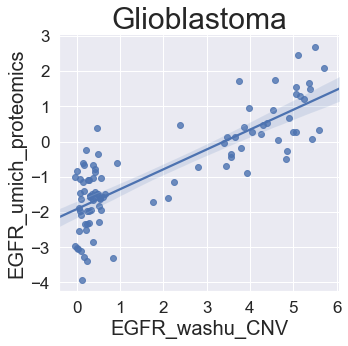

In [18]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = "none", title = "Glioblastoma", ra_stats = False ,show_plot = True, save_file_name = "png_files/Figure3B_Gbm_pancan")

In [14]:
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")


Correlation: 0.8178896916854856
P_value:4.753874182293731e-24


# Repeat Steps 1 and 2 for the other 7 cancers

# Kidney 

In [36]:
prot_CNV_Tumor = c.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)    


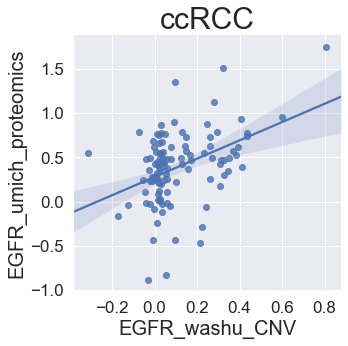

In [37]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue ="none", ra_stats = False, show_plot = True, title = "ccRCC", save_file_name = "png_files/Figure3B_Kidney_pancan")
#print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# Ovarian 

In [19]:
#prot_CNV_Tumor = o.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
#drop = ['Database_ID']
#prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)  

In [20]:
#plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", ra_stats = False,title = "OV", show_plot = True, save_file_name = "png_files/Figure3B_Ovarian")
#print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# Colon

In [40]:
#prot_CNV_Tumor = col.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
#drop = ['Database_ID']
#prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop) 

In [21]:
#plot_pearson(prot_CNV,"EGFR_CNV","EGFR_proteomics",hue = "none", ra_stats = False, title = "Colon", show_plot = True, save_file_name = "png_files/Figure3B_Colon")
#print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# Brca 

In [34]:
prot_CNV_Tumor = b.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)

cptac warning: washu_CNV data was not found for the following samples, so washu_CNV data columns were filled with NaN for these samples: 11BR057, 11BR076, 11BR078 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/pancan/pancandataset.py, line 139)
cptac warning: umich_proteomics data was not found for the following samples, so umich_proteomics data columns were filled with NaN for these samples: CPT000814, CPT001846 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/pancan/pancandataset.py, line 139)


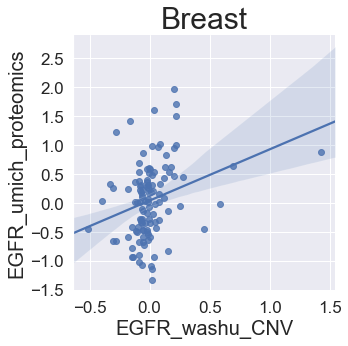

Correlation: 0.28731817095336276
P_value:0.0021290314103199664


In [35]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = "none", ra_stats = False, title = "Breast", show_plot = True, save_file_name = "png_files/Figure3B_Brca_pancan")
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")


# LUAD

In [38]:
prot_CNV_Tumor = l.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)

cptac warning: washu_CNV data was not found for the following samples, so washu_CNV data columns were filled with NaN for these samples: C3L-01890 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/pancan/pancandataset.py, line 139)


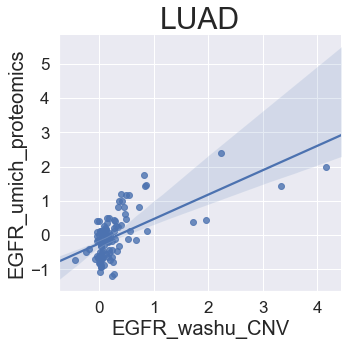

Correlation: 0.6330153861249752
P_value:1.5229599308436397e-13


In [39]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = 'none', title = "LUAD", ra_stats = False, show_plot = True, save_file_name = "png_files/Figure3B_Luad_pancan")
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")

# HNSCC

In [40]:
prot_CNV_Tumor = hn.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)

cptac warning: washu_CNV data was not found for the following samples, so washu_CNV data columns were filled with NaN for these samples: C3L-00994.C, C3L-02617.C, C3L-04350.C, C3L-05257.C, C3N-01757.C, C3N-03042.C (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/pancan/pancandataset.py, line 139)


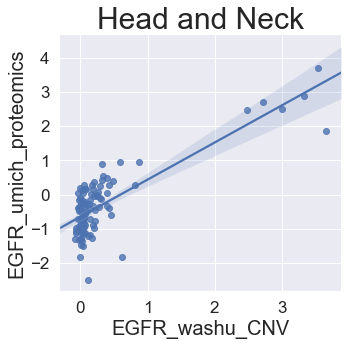

Correlation: 0.8100066646304529
P_value:8.715448742742983e-27


In [41]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = "none", title = "Head and Neck", ra_stats = False, show_plot = True, save_file_name = "png_files/Figure3B_Hnscc_pancan")
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")

# LSCC

In [44]:
prot_CNV_Tumor = ls.join_omics_to_omics(df1_name = "proteomics", df1_source = "umich", df2_name = "CNV", df2_source = "washu", genes1 = "EGFR", genes2 = "EGFR", tissue_type = "tumor")
drop = ['Database_ID']
prot_CNV_Tumor = u.reduce_multiindex(df=prot_CNV_Tumor, levels_to_drop=drop)

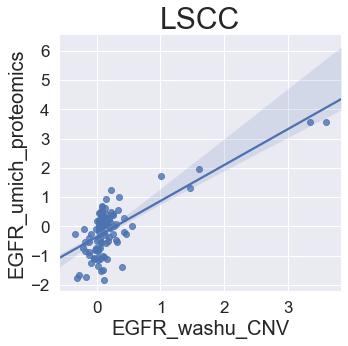

Correlation: 0.7362846816319715
P_value:4.951566424145093e-20


In [45]:
p.plot_pearson(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics", hue = "none", title = "LSCC" , ra_stats = False, show_plot = True, save_file_name = "png_files/Figure3B_Lscc_pancan")
print_stats(prot_CNV_Tumor,"EGFR_washu_CNV","EGFR_umich_proteomics")


NameError: name 'both' is not defined